Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# from tqdm import tqdm

Filtering Data

In [ ]:
# WARNING: paths probably need to be changed
df = pd.read_csv('MLPGIT\ITU-MachineLearning-FinalProject-Couriers\data\claims_train.csv')
df.drop('Area', axis=1, inplace=True)               # Area and Density are derivable from eachother => redundant
df.loc[df['Exposure']>1, 'Exposure'] = 1            # Exposure over 1 will simply be 1 - we assume error in data collection
df.drop('VehGas', axis=1, inplace=True)             # Gas type is irrelevant to risk
df.drop('Region', axis=1, inplace=True)             # Region is equally irrelevant
df_f = df[df['VehAge']<30]                          # Only keeping cars under 30, as they are not veterans yet

<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:1: SyntaxWarning: invalid escape sequence '\I'
C:\Users\zamol\AppData\Local\Temp\ipykernel_24540\3838332621.py:1: SyntaxWarning: invalid escape sequence '\I'
  df = pd.read_csv('MLPGIT\ITU-MachineLearning-FinalProject-Couriers\data\claims_train.csv')


Scaling Data

In [14]:
df_feature_columns = df_f.drop(columns=['IDpol', 'ClaimNb', "Exposure"])
num_col = df_feature_columns.select_dtypes(include=['float', 'int64']).columns
cat_col = df_feature_columns.select_dtypes(include=['object', 'category']).columns
# idk if we're doing something with the vehicle brand

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_feature_columns[num_col])

In [29]:
pca = PCA()          # pca with all features, aka as many components as there are features
X_pca = pca.fit_transform(X_scaled)

print(pca.explained_variance_ratio_)
# for each principal component (pc), how much of the varaince is exlained by said pc?

explained = np.cumsum(pca.explained_variance_ratio_)
print(explained)
# cummulitively summed up until everything is explained. We want to keep between 80 to 90% of the data explained

n_componentss = np.searchsorted(explained, 0.9) +1
print("How many componenents we need to keep depending on variance explained:")
print(n_componentss)
# +1 because python starts count at 0 duh

pca2 = PCA(n_components=n_componentss)
X_pca2 = pca2.fit_transform(X_scaled)

[0.30293952 0.22049852 0.19821793 0.17629132 0.10205271]
[0.30293952 0.52343804 0.72165597 0.89794729 1.        ]
How many componenents we need to keep depending on variance explained:
5


Plot PCA

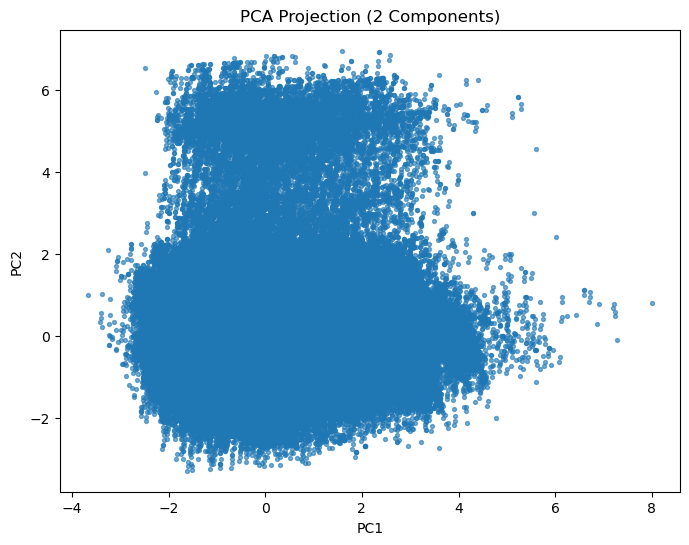

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca2[:,0], X_pca2[:,1], s=8, alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection')
plt.show()

Clustering with KMeans

In [ ]:
silhouette_scores=[]
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca2)
    sil = silhouette_score(X_pca2, labels)
    silhouette_scores.append((k,sil))

# print(silhouette_scores)
best_k = max(silhouette_scores, key=lambda x: x[1])[0]

kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(X_pca2)

df_f['Cluster'] = clusters

KeyboardInterrupt: 

Plot Kmeans Clustering

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=clusters, cmap="tab10", alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KMeans Clusters for PCA")
plt.grid(True)
plt.show()